# **Projeto de previs√£o de rotatividade de usu√°rios (churn) no Waze atrav√©s de Regress√£o Log√≠stica**

## **Objetivo**

Neste projeto, estaremos desenvolvendo e avaliando um modelo de regress√£o log√≠stica binomial com o prop√≥sito de antecipar a rotatividade de usu√°rios do aplicativo Waze, utilizando diversas vari√°veis como base para a previs√£o.

A rotatividade de clientes, tamb√©m conhecida como churn, √© uma taxa que reflete a quantidade de receita ou clientes que uma empresa perdeu ao longo de um determinado per√≠odo. Compreender por que os clientes utilizam o aplicativo, e mais crucialmente, por que deixam de us√°-lo, √© essencial para determinar o momento adequado para a√ß√£o e para implementar estrat√©gias visando evitar a perda de usu√°rios. 

A regress√£o log√≠stica √© uma ferramenta valiosa para estimar a probabilidade de um resultado. Sua utilidade reside na capacidade de considerar m√∫ltiplas vari√°veis em rela√ß√£o √† vari√°vel que est√° sendo medida.

O projeto √© organizado da seguinte forma: 

1. An√°lise explorat√≥tia de dados.
2. Pressupostos de regress√£o de regress√£o log√≠stica.
3. Desenvolvimento e avalia√ß√£o de modelo.
4. Interpretando os resultados do modelo.
5. Conclus√µes finais.

Cada etapa desempenha um papel crucial na compreens√£o da din√¢mica da rotatividade de usu√°rios no aplicativo Waze, permitindo uma abordagem mais informada e estrat√©gica para mitigar a perda de clientes.

No pr√≥ximo projeto, abordaremos o mesmo tema utilizando t√©cnicas de aprendizado de m√°quina.

## An√°lise explorat√≥ria de dados 


Nesta se√ß√£o realizamos os passos fundamentais na constru√ß√£o de um modelo robusto, incluindo a an√°lise explorat√≥ria de dados, visualiza√ß√£o e o pr√©-processamento de dados. A an√°lise explorat√≥ria de dados permite identificar padr√µes, tend√™ncias e rela√ß√µes entre as vari√°veis, oferecendo insights valiosos para a constru√ß√£o do modelo preditivo. Durante esse processo, enfrentamos desafios associados √† presen√ßa de valores ausentes e outliers, uma vez que esses elementos podem exercer um impacto significativo no desempenho de um modelo de regress√£o log√≠stica. 


Come√ßamos com a importa√ß√£o dos pacotes e bibliotecas necess√°rios para construir e avaliar modelo de regress√£o log√≠stica.

In [17]:
# Pacotes de processamento de dados

import pandas as pd
import numpy as np

# Pacotes de visualiza√ß√£o de dados

import matplotlib.pyplot as plt
%matplotlib inline
#import plotly.io as pio
#pio.renderers.default = 'notebook'
import seaborn as sns

# Pacotes para regress√£o log√≠stica e matriz de confus√£o

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [18]:
# Abrimos os dados

df = pd.read_csv('waze_dataset.csv')

Os dados foram obtidos atrav√©s do curso do Google "Advanced Data Analytics Certification" em parceria com o Waze.

In [19]:
df.head(10)

ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   
5   5  retained       113     103      279.544437                     2637   
6   6  retained         3       2      236.725314                      360   
7   7  retained        39      35      176.072845                     2999   
8   8  retained        57      46      183.532018                      424   
9   9   churned        84      68      244.802115                     2997   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   
5                       0                       0        901.238699   
6                     185                      18       5249.172828   
7                       0                       0       7892.052468   
8                       0                      26       2651.709764   
9                      72                       0       6043.460295   

   duration_minutes_drives  activity_days  driving_days   device  
0              1985.775061             28            19  Android  
1              3160.472914             13            11   iPhone  
2              1610.735904             14             8  Android  
3               587.196542              7             3   iPhone  
4              1219.555924             27            18  Android  
5               439.101397             15            11   iPhone  
6               726.577205             28            23   iPhone  
7              2466.981741             22            20   iPhone  
8              1594.342984             25            20  Android  
9              2341.838528              7             3   iPhone

### Legendas


`ID` √≠ndice sequencial.

`label` vari√°vel bin√°ria ("retained" e "churned") para indicar se um usu√°rio parou de usar o aplicativo a qualquer momento durante o m√™s. "Retained" significa que um usu√°rio foi "mantido", "churned" - abandonou/parou de usar o app.

`sessions` quantas vezes um usu√°rio abriu o aplicativo durante o m√™s.

`drives` ocorr√™ncia de corridas de pelo menos 1 km durante o m√™s.

`total_sessions` uma estimativa do n√∫mero total de sess√µes desde que um usu√°rio come√ßou usar o aplicativo.

`n_days_after_onboarding` n√∫mero de dias desde que um usu√°rio se cadastrou no aplicativo.

`total_navigations_fav1` n√∫mero total de corridas at√© o primeiro local favorito do usu√°rio.

`total_navigations_fav2` n√∫mero total de corridas at√© o segundo local favorito do usu√°rio.

`driven_km_drives` n√∫mero total de quil√¥metros rodados durante o m√™s.

`duration_minutes_drives` dura√ß√£o total de corridas em minutos durante o m√™s.

`activity_days` n√∫mero de dias que o usu√°rio abre o aplicativo durante o m√™s.

`driving_days` n√∫mero de dias que o usu√°rio dirige (pelo menos 1 km) durante o m√™s.

`device`  o tipo de dispositivo ("android" ou "iphone") utilizado por um usu√°rio para iniciar uma sess√£o no aplicativo. 

Dado nosso foco na rotatividade de usu√°rios, a coluna `label` √© fundamental. Al√©m de `label`, as vari√°veis relacionadas ao comportamento do usu√°rio s√£o as mais pertinentes. Todas as vari√°veis est√£o associadas ao comportamento do usu√°rio, com exce√ß√£o do `ID`.

Outliers (_valores at√≠picos_) e valores extremos podem impactar significativamente os modelos de regress√£o log√≠stica. √â importante identificar e compreender outliers para garantir uma interpreta√ß√£o mais precisa e robusta dos dados. Para isso vamos substituir dados extremos por dados m√©dios, identificar valores ausentes e/ou remover valores maiores que 3 desvios padr√£o. 

Al√©m disso, pode ser √∫til criar novas vari√°veis multiplicando-as ou calculando a raz√£o entre duas vari√°veis. Por exemplo, nesse projeto podemos criar uma vari√°vel `drives_sessions_ratio` dividindo corridas (`drives`) por sess√µes (`sessions`).

Verificamos a estrutura de dados atrav√©s de `shape` e `info`.

In [20]:
df.shape

(14999, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


A coluna `label` apresenta $700$ valores ausentes, mas abordaremos essa quest√£o mais adiante. 

Primeiro, vamos excluir a coluna `ID` utilizando o m√©todo `drop()`, uma vez que essa informa√ß√£o n√£o √© necess√°ria para a an√°lise em quest√£o.

In [22]:
df = df.drop('ID', axis=1)

Analisamos a distribui√ß√£o das classes na vari√°vel dependente `label`:

In [23]:
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Exploramos as estat√≠sticas descritivas dos dados com o objetivo de identificar poss√≠veis valores at√≠picos (outliers).

In [24]:
# Verificamos as estat√≠sticas descritivas dos dados

df.describe()

sessions        drives  total_sessions  n_days_after_onboarding  \
count  14999.000000  14999.000000    14999.000000             14999.000000   
mean      80.633776     67.281152      189.964447              1749.837789   
std       80.699065     65.913872      136.405128              1008.513876   
min        0.000000      0.000000        0.220211                 4.000000   
25%       23.000000     20.000000       90.661156               878.000000   
50%       56.000000     48.000000      159.568115              1741.000000   
75%      112.000000     93.000000      254.192341              2623.500000   
max      743.000000    596.000000     1216.154633              3500.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            14999.000000            14999.000000      14999.000000   
mean               121.605974               29.672512       4039.340921   
std                148.121544               45.394651       2502.149334   
min                  0.000000                0.000000         60.441250   
25%                  9.000000                0.000000       2212.600607   
50%                 71.000000                9.000000       3493.858085   
75%                178.000000               43.000000       5289.861262   
max               1236.000000              415.000000      21183.401890   

       duration_minutes_drives  activity_days  driving_days  
count             14999.000000   14999.000000  14999.000000  
mean               1860.976012      15.537102     12.179879  
std                1446.702288       9.004655      7.824036  
min                  18.282082       0.000000      0.000000  
25%                 835.996260       8.000000      5.000000  
50%                1478.249859      16.000000     12.000000  
75%                2464.362632      23.000000     19.000000  
max               15851.727160      31.000000     30.000000

Ao analisar os n√∫meros, observamos que as seguintes colunas apresentam valores m√°ximos que ultrapassam consideravelmente o $75¬∫$ percentil por m√∫ltiplos desvios padr√£o:


* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

Essa observa√ß√£o sugere a poss√≠vel presen√ßa de outliers nessas vari√°veis.

### Visualiza√ß√£o de dados


Iniciamos nossa an√°lise ao examinar a distribui√ß√£o de seguintes vari√°veis essenciais por meio de histogramas: `sessions`, `drives`, `total_sessions`, `activity_days` e `driving_days`.

Come√ßamos com o historgrama da vari√°vel `sessions`(quantas vezes um usu√°rio abriu o aplicativo durante o m√™s).

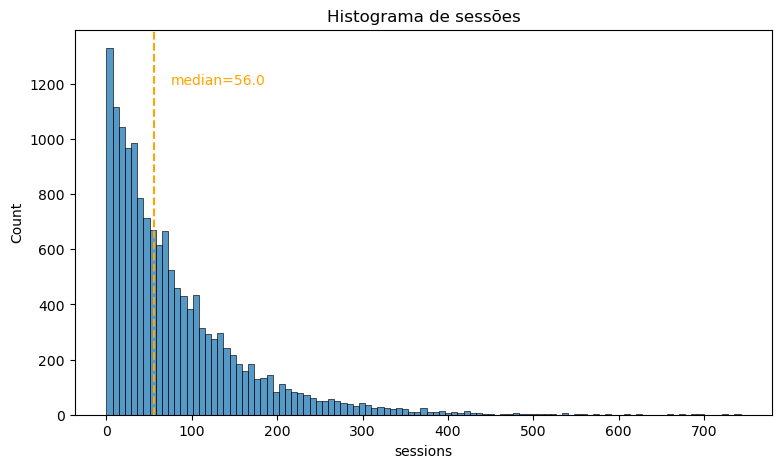

In [25]:
# Histograma 

plt.figure(figsize=(9,5))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='orange', linestyle='--')
plt.text(75,1200, 'median=56.0', color='orange')
plt.title('Histograma de sess√µes');

A vari√°vel `sessions` apresenta uma distribui√ß√£o assim√©trica enviesada √† direita. A mediana sugere que metade dos usu√°rios possui $56$ sess√µes ou menos. Al√©m disso, de acordo com as estat√≠sticas descritivas mencionadas anteriormente, o histograma corrobora a presen√ßa de alguns usu√°rios com mais de $700$ sess√µes.

Para aumentar a efici√™ncia, vamos criar uma fun√ß√£o que construa o histograma e, assim, utiliz√°-la sempre que necess√°rio.

In [26]:
# Fun√ß√£o auxilar para constru√ß√£o de histograma

def histogramas(column_str, median_text=True, **kwargs):    # **kwargs = argumentos de palavra-chave
                                                             
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(9,5))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plotar o histograma
    plt.axvline(median, color='orange', linestyle='--')         # Adicionar a linha mediana
    if median_text==True:                                    # Adicionar texto a mediana
        ax.text(0.25, 0.85, f'median={median}', color='orange',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

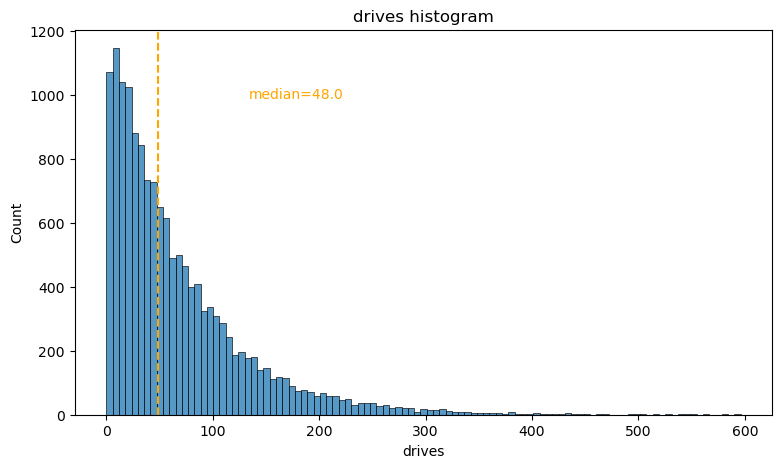

In [27]:
# Histograma para coluna `drives` 

histogramas('drives')

As informa√ß√µes da coluna `drives` seguem uma distribui√ß√£o semelhante √† coluna de `sessions`. √â inclinado para a direita, seguindo (aproximadamente) uma distribui√ß√£o log-normal, com uma mediana de $48$. No entanto, alguns motoristas realizaram mais de $400$ corridas no √∫ltimo m√™s.

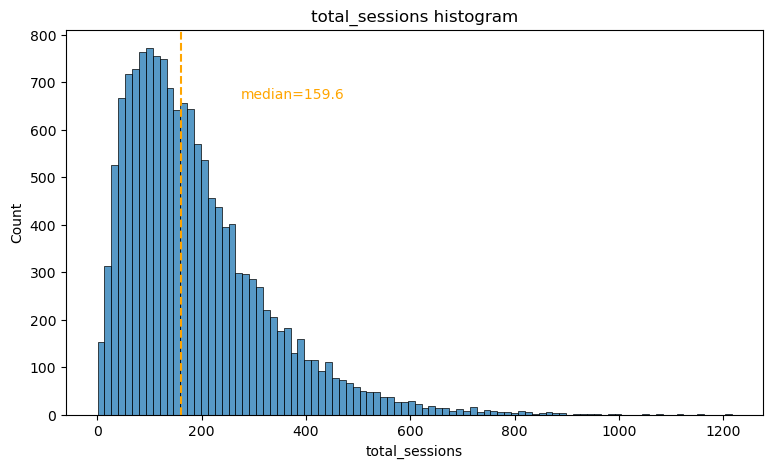

In [28]:
# Histograma da coluna `total_session`, n√∫mero total de sess√µes desde que um usu√°rio come√ßou usar o aplicativo

histogramas('total_sessions')

A mediana do n√∫mero total de sess√µes √© $159,6$. √â uma informa√ß√£o interessante: a m√©dia de sess√µes no √∫ltimo m√™s sendo $56$, e a m√©dia total de sess√µes aproximadamente $160$, sugere que uma consider√°vel propor√ß√£o do total de corridas de um usu√°rio pode ter ocorrido no √∫ltimo m√™s. 

Median: 16.0


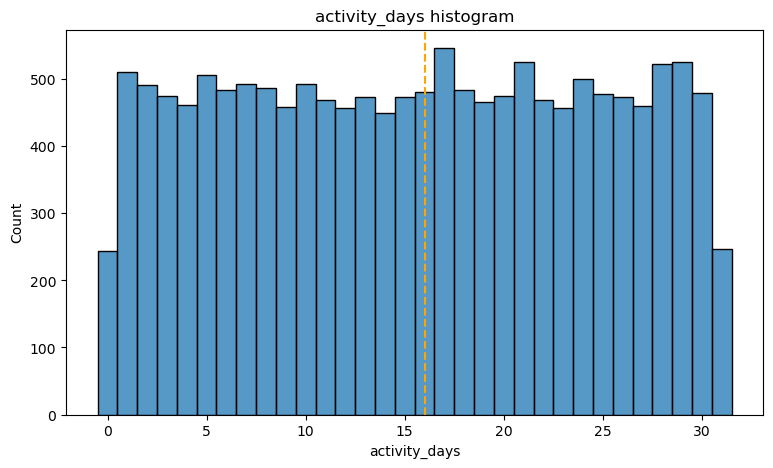

In [29]:
# Histograma do n√∫mero de dias que o usu√°rio abre o aplicativo durante o m√™s

histogramas('activity_days', median_text=False, discrete=True)

No √∫ltimo m√™s, a m√©dia de aberturas do aplicativo por usu√°rio foi de 16 vezes. O histograma revela uma distribui√ß√£o (quase) uniforme, com aproximadamente 500 pessoas abrindo o aplicativo em cada contagem de dias. No entanto, √© not√°vel que existem cerca de 250 pessoas que n√£o abriram o aplicativo e outras 250 que o abriram todos os dias do m√™s.

Essa distribui√ß√£o √© interessante porque n√£o reflete a distribui√ß√£o da `sessions`, que poderia ser correlacionada com a `activity_days`.

Median: 12.0


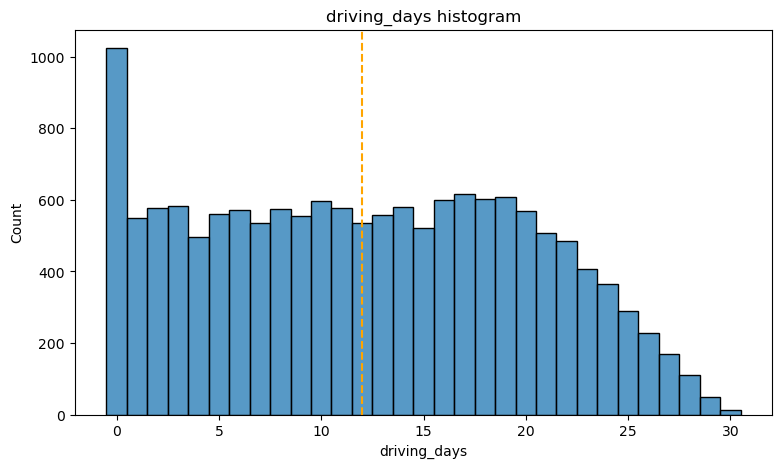

In [30]:
# Histograma do n√∫mero de dias que o usu√°rio dirige (pelo menos 1 km) durante o m√™s

histogramas('driving_days', median_text=False, discrete=True)

O n√∫mero de dias em que os usu√°rios dirigiram em cada m√™s (`driving_days`) √© quase uniforme e est√° em grande parte correlacionado com o n√∫mero de dias em que abriram o aplicativo naquele m√™s (`activity_days`). No entanto, √© importante notar que a distribui√ß√£o de `driving_days` diminui √† medida que nos deslocamos para a direita.

Dado que `driving_days` e `activity_days` representam contagens de dias ao longo de um m√™s e est√£o relacionados, podemos represent√°-los conjuntamente em um √∫nico histograma. 

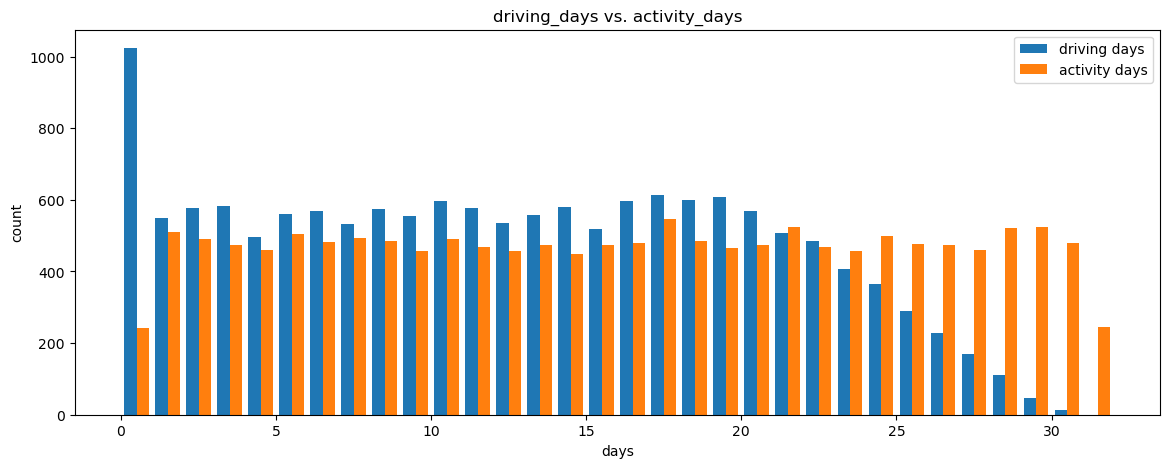

In [31]:
# Histograma `driving_days` vs `activity_days`

plt.figure(figsize=(14,5))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

O histograma parece contradit√≥rio: h√° menos pessoas que n√£o usaram o aplicativo durante o m√™s, mas mais pessoas que n√£o dirigiram durante o mesmo per√≠odo? Este √© mais um exemplo de que, embora essas vari√°veis estejam relacionadas, elas n√£o s√£o id√™nticas. √â poss√≠vel que as pessoas abram o aplicativo mais vezes do que o usam para dirigir, talvez para verificar o tempo de percurso, informa√ß√µes de rota, condi√ß√µes de tr√°fego, atualizar configura√ß√µes ou at√© mesmo por engano.

Uma abordagem adicional para avaliar a validade dessas vari√°veis √© criar um gr√°fico de dispers√£o, onde o eixo $x$ representa uma vari√°vel e o eixo $y$ representa a outra. Isso pode proporcionar uma visualiza√ß√£o mais clara das rela√ß√µes entre as duas vari√°veis.

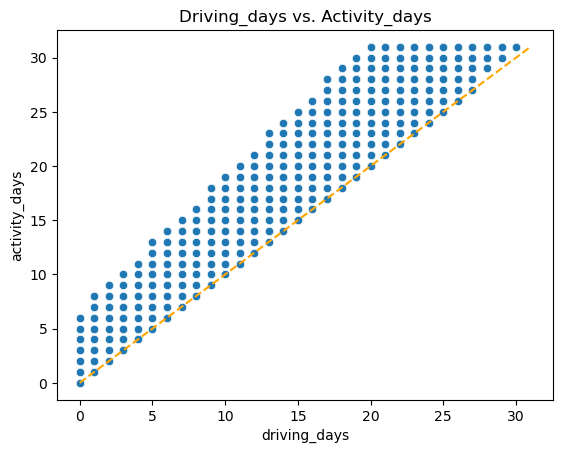

In [32]:
# Gr√°fico de dispers√£o driving_days vs. activity_days

sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('Driving_days vs. Activity_days')
plt.plot([0,31], [0,31], color='orange', linestyle='--');

√â relevante observar que existe um limite te√≥rico: um usu√°rio n√£o pode ter mais dias de condu√ß√£o do que dias de atividade. √â positivo notar que nenhuma das amostras nos dados viola essa regra.

Vamos analisar a vari√°vel `device`, que indica o tipo de dispositivo ("android" ou "iphone") utilizado por um usu√°rio para iniciar uma sess√£o no aplicativo. Dado que esta vari√°vel √© categ√≥rica, optamos por utilizar um gr√°fico de pizza (pie chart) para a visualiza√ß√£o.

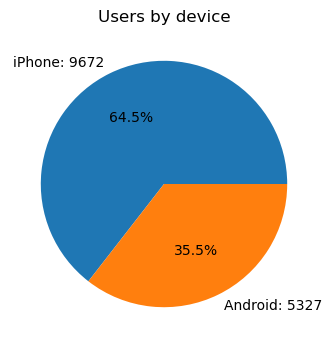

In [33]:
# Pie chart 

fig = plt.figure(figsize=(4,4))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

Observamos que h√° quase o dobro de usu√°rios de iPhone em compara√ß√£o com usu√°rios de Android, conforme representado nos dados. Sabendo disso, √© relevante visualizar quantos usu√°rios de cada categoria deixaram de utilizar o aplicativo. Essa an√°lise pode ajudar a entender melhor como a reten√ß√£o varia entre os diferentes dispositivos utilizados pelos usu√°rios.

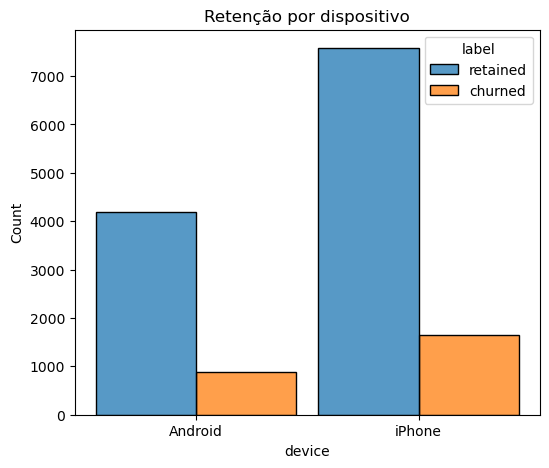

In [34]:
# Histograma

plt.figure(figsize=(6,5))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Reten√ß√£o por dispositivo');

A propor√ß√£o de usu√°rios deixaram de utilizar o aplicativo em rela√ß√£o aos usu√°rios retidos √© consistente entre os dois tipos de dispositivos.

### **Cria√ß√£o de vari√°veis novas**

Conforme discutido anteriormente, pode ser √∫til criar novas vari√°veis por meio da multiplica√ß√£o ou do c√°lculo da raz√£o entre duas vari√°veis. Vamos criar duas novas vari√°veis que podem ser necess√°rias para abordar o problema do nosso projeto: `km_per_driving_day` e `professional_driver`.

#### **`km_per_driving_day`**

A taxa de rotatividade de usu√°rios se correlaciona com a dist√¢ncia percorrida por dia no √∫ltimo m√™s (FONTE?). Vamos criar a coluna com essas informa√ß√µes.

In [35]:
# Criamos a coluna `km_per_driving_day` 
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Verificamos a estat√≠stica descritiva
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Como observado na an√°lise anterior, a coluna `driving_days` cont√©m valores nulos, o que resulta em valores infinitos na coluna `km_per_driving_day`, uma vez que a divis√£o por zero √© indefinida.

Podemos resolver isso convertendo os valores infinitos a zero, utilizando o m√©todo `np.inf`:

In [36]:
# Converter valores infinitos em zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# Verificamos a estat√≠stica
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

Criamos uma nova var√°vel bin√°ria `professional_driver` com o objetivo de distinguir motoristas professionais (por exemplo, motoristas de aplicativo) dos usu√°rios comuns. Definimos um motorista profissional como aquele que realizou 60 corridas ou mais <u>**e**</u> dirigiu por 15 dias ou mais no √∫ltimo m√™s. 

Para criar a coluna usamos a fun√ß√£o `np.where()`:

In [37]:
# Criamos a coluna nova ('1' indica que motorista √© professional)

df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [38]:
# Verificamos a quantidade de motoristas profissionais 
print(df['professional_driver'].value_counts())

# Agrupamos por 'label' para ver quantidade de usu√°rios quem parou de usar o aplicativo 
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

**A taxa de evas√£o para os motoristas profissionais √© 7.6%, enquanto para n√£o profissionais √© 19,9%. Esta informa√ß√£o poderia adicionar um sinal preditivo ao modelo.**

#### **Codificando vari√°veis categ√≥ricas**

Vamos realizar a convers√£o do tipo de dados das vari√°veis `label` e `device` para bin√°rios. Essa modifica√ß√£o √© fundamental para a correta aplica√ß√£o e treinamento de um modelo de regress√£o log√≠stica.

Atribu√≠mos o valor `0` para os usu√°rios `retained` e `1` para os usu√°rios `churned`. 

In [39]:
# Criamos 'label2' como vari√°vel bin√°ria

df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

label  label2
14994  retained       0
14995  retained       0
14996  retained       0
14997   churned       1
14998  retained       0

Criamos uma nova coluna bin√°ria chamada `device2` que codifica os dispositivos do usu√°rio da seguinte forma: `Android` -> `0`, `iPhone` -> `1`.

In [40]:
# Criamos `device2` como vari√°vel bin√°ria 

df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

device  device2
14994   iPhone        1
14995  Android        0
14996   iPhone        1
14997   iPhone        1
14998   iPhone        1

In [41]:
# Apagamos as vari√°veis categ√≥ricas 

df = df.drop(columns = ['label', 'device'])
df.head()

sessions  drives  total_sessions  n_days_after_onboarding  \
0       283     226      296.748273                     2276   
1       133     107      326.896596                     1225   
2       114      95      135.522926                     2651   
3        49      40       67.589221                       15   
4        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days  km_per_driving_day  \
0              1985.775061             28            19          138.360267   
1              3160.472914             13            11         1246.901868   
2              1610.735904             14             8          382.393602   
3               587.196542              7             3          304.530374   
4              1219.555924             27            18          219.455667   

   professional_driver  label2  device2  
0                    1       0        0  
1                    0       0        1  
2                    0       0        0  
3                    0       0        1  
4                    1       0        0

In [42]:
# Scale the data

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

sessions    drives  total_sessions  n_days_after_onboarding  \
0  0.380888  0.379195        0.243868                 0.649886   
1  0.179004  0.179530        0.268663                 0.349256   
2  0.153432  0.159396        0.111275                 0.757151   
3  0.065949  0.067114        0.055405                 0.003146   
4  0.113055  0.114094        0.138187                 0.445652   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                0.168285                0.000000          0.121593   
1                0.015372                0.154217          0.646476   
2                0.000000                0.000000          0.141964   
3                0.260518                0.016867          0.040390   
4                0.134304                0.012048          0.184148   

   duration_minutes_drives  activity_days  driving_days  km_per_driving_day  \
0                 0.124262       0.903226      0.633333            0.008973   
1                 0.198453       0.419355      0.366667            0.080861   
2                 0.100575       0.451613      0.266667            0.024798   
3                 0.035931       0.225806      0.100000            0.019749   
4                 0.075869       0.870968      0.600000            0.014232   

   professional_driver  label2  device2  
0                  1.0     0.0      0.0  
1                  0.0     0.0      1.0  
2                  0.0     0.0      0.0  
3                  0.0     0.0      1.0  
4                  1.0     0.0      0.0

#### **Abordagem do problema de valores ausentes e outliers**

Conforme identificado na an√°lise anterior, os dados apresentam valores ausentes e outliers. Vamos abordar esses problemas para garantir uma an√°lise mais robusta e precisa.

A vari√°vel `label` tem $700$ valores ausentes, o que representa menos de $5%$ do total de dados. Usamos o m√©todo de `impute.kNN` do `sklearn` para completar valores ausentes usando k-Nearest Neighbors. 

In [43]:
# Completamos valores ausentes 

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [44]:
df.isna().sum()

sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
km_per_driving_day         0
professional_driver        0
label2                     0
device2                    0
dtype: int64

O problemas com valores ausentes foi resolvido.

Anteriormente, determinamos que sete vari√°veis apresentam sinais claros de outliers: 

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

Podemos resolver o problema calculando o 95¬∫ percentil de cada coluna e substituindo qualquer valor na coluna que o exceda por esse percentil.

In [45]:
# Resolvendo outliers

for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

In [46]:
# Verificamos

df.describe()

sessions        drives  total_sessions  n_days_after_onboarding  \
count  14999.000000  14999.000000    14999.000000             14999.000000   
mean       0.103053      0.107480        0.151169                 0.499382   
std        0.090576      0.092797        0.097539                 0.288477   
min        0.000000      0.000000        0.000000                 0.000000   
25%        0.030956      0.033557        0.074380                 0.250000   
50%        0.075370      0.080537        0.131050                 0.496854   
75%        0.150740      0.156040        0.208870                 0.749285   
max        0.327052      0.337248        0.373493                 1.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            14999.000000            14999.000000      14999.000000   
mean                 0.092569                0.065577          0.183648   
std                  0.100879                0.088519          0.104912   
min                  0.000000                0.000000          0.000000   
25%                  0.007282                0.000000          0.101887   
50%                  0.057443                0.021687          0.162544   
75%                  0.144013                0.103614          0.247570   
max                  0.343042                0.298795          0.417998   

       duration_minutes_drives  activity_days  driving_days  \
count             14999.000000   14999.000000  14999.000000   
mean                  0.111875       0.501197      0.405996   
std                   0.077223       0.290473      0.260801   
min                   0.000000       0.000000      0.000000   
25%                   0.051645       0.258065      0.166667   
50%                   0.092208       0.516129      0.400000   
75%                   0.154488       0.741935      0.633333   
max                   0.293721       1.000000      1.000000   

       km_per_driving_day  professional_driver        label2       device2  
count        14999.000000         14999.000000  14999.000000  14999.000000  
mean             0.037546             0.172945      0.169078      0.644843  
std              0.066801             0.378212      0.374833      0.478577  
min              0.000000             0.000000      0.000000      0.000000  
25%              0.008835             0.000000      0.000000      0.000000  
50%              0.017697             0.000000      0.000000      1.000000  
75%              0.036231             0.000000      0.000000      1.000000  
max              1.000000             1.000000      1.000000      1.000000

O problema com outliers foi resolvida.

## **Pressupostos de regress√£o de regress√£o log√≠stica**

Verificar os pressupostos de regress√£o de regress√£o log√≠stica √© crucial para garantir a validade e confiabilidade do modelo. Neste projeto, abordamos as seguintes hip√≥teses:

* Observa√ß√µes independentes (refere-se a como os dados foram coletados).

* Sem valores discrepantes (outliers) extremos.

* Aus√™ncia de colinearidade entre as vari√°veis preditoras $X$ (s√£o vari√°veis que permitem predizer uma resposta).

* A rela√ß√£o linear entre $X$ e as probabilidades logar√≠tmicas estimadas da vari√°vel dependente y em rela√ß√£o a $X$, ou _logit_ de $y$ (mas a rela√ß√£o entre uma vari√°vel preditora e a vari√°vel dependente n√£o precisa ser linear).

Para a primeira hip√≥tese, podemos assumir que as observa√ß√µes s√£o independentes para este projeto. A segunda hip√≥tese j√° foi abordada. A seguir, iremos avaliar a presen√ßa de colinearidade, enquanto a √∫ltima hip√≥tese ser√° verificada ap√≥s a modelagem.

#### **Colinearidade**

Primeiro, vamos gerar uma matriz de correla√ß√£o de Pearson.

In [47]:
# Matriz de correla√ß√£o
df.corr(method='pearson')

sessions    drives  total_sessions  \
sessions                 1.000000  0.996907        0.595796   
drives                   0.996907  1.000000        0.593945   
total_sessions           0.595796  0.593945        1.000000   
n_days_after_onboarding  0.006480  0.006198        0.005328   
total_navigations_fav1   0.003123  0.002307        0.002377   
total_navigations_fav2   0.009746  0.010365        0.008061   
driven_km_drives         0.001425  0.001789       -0.000835   
duration_minutes_drives -0.005364 -0.004763       -0.001456   
activity_days            0.024374  0.023821        0.015932   
driving_days             0.018518  0.018036        0.012568   
km_per_driving_day      -0.011099 -0.010609       -0.014563   
professional_driver      0.443151  0.443705        0.254599   
label2                   0.033695  0.034528        0.022467   
device2                  0.010453  0.009457        0.010012   

                         n_days_after_onboarding  total_navigations_fav1  \
sessions                                0.006480                0.003123   
drives                                  0.006198                0.002307   
total_sessions                          0.005328                0.002377   
n_days_after_onboarding                 1.000000                0.001232   
total_navigations_fav1                  0.001232                1.000000   
total_navigations_fav2                 -0.007468                0.002467   
driven_km_drives                       -0.002852               -0.007898   
duration_minutes_drives                -0.009140                0.002722   
activity_days                          -0.009725                0.012176   
driving_days                           -0.008563                0.011339   
km_per_driving_day                      0.011631               -0.002056   
professional_driver                     0.001364                0.001135   
label2                                 -0.124711                0.051766   
device2                                -0.012044                0.002030   

                         total_navigations_fav2  driven_km_drives  \
sessions                               0.009746          0.001425   
drives                                 0.010365          0.001789   
total_sessions                         0.008061         -0.000835   
n_days_after_onboarding               -0.007468         -0.002852   
total_navigations_fav1                 0.002467         -0.007898   
total_navigations_fav2                 1.000000          0.003831   
driven_km_drives                       0.003831          1.000000   
duration_minutes_drives               -0.000951          0.690996   
activity_days                         -0.003489         -0.005620   
driving_days                           0.003197         -0.007816   
km_per_driving_day                     0.004308          0.343509   
professional_driver                    0.006892          0.000219   
label2                                 0.014263          0.020131   
device2                               -0.002156         -0.000526   

                         duration_minutes_drives  activity_days  driving_days  \
sessions                               -0.005364       0.024374      0.018518   
drives                                 -0.004763       0.023821      0.018036   
total_sessions                         -0.001456       0.015932      0.012568   
n_days_after_onboarding                -0.009140      -0.009725     -0.008563   
total_navigations_fav1                  0.002722       0.012176      0.011339   
total_navigations_fav2                 -0.000951      -0.003489      0.003197   
driven_km_drives                        0.690996      -0.005620     -0.007816   
duration_minutes_drives                 1.000000      -0.005852     -0.007585   
activity_days                          -0.005852       1.000000      0.947706   
driving_days                           -0.007585       0.947706      1.000000   
km_per_driv

Construimos um mapa de correla√ß√£o para visualizar as correla√ß√µes entre as vari√°veis da matriz de correla√ß√£o. O mapa utiliza cores para indicar a intensidade e a dire√ß√£o dessas rela√ß√µes.

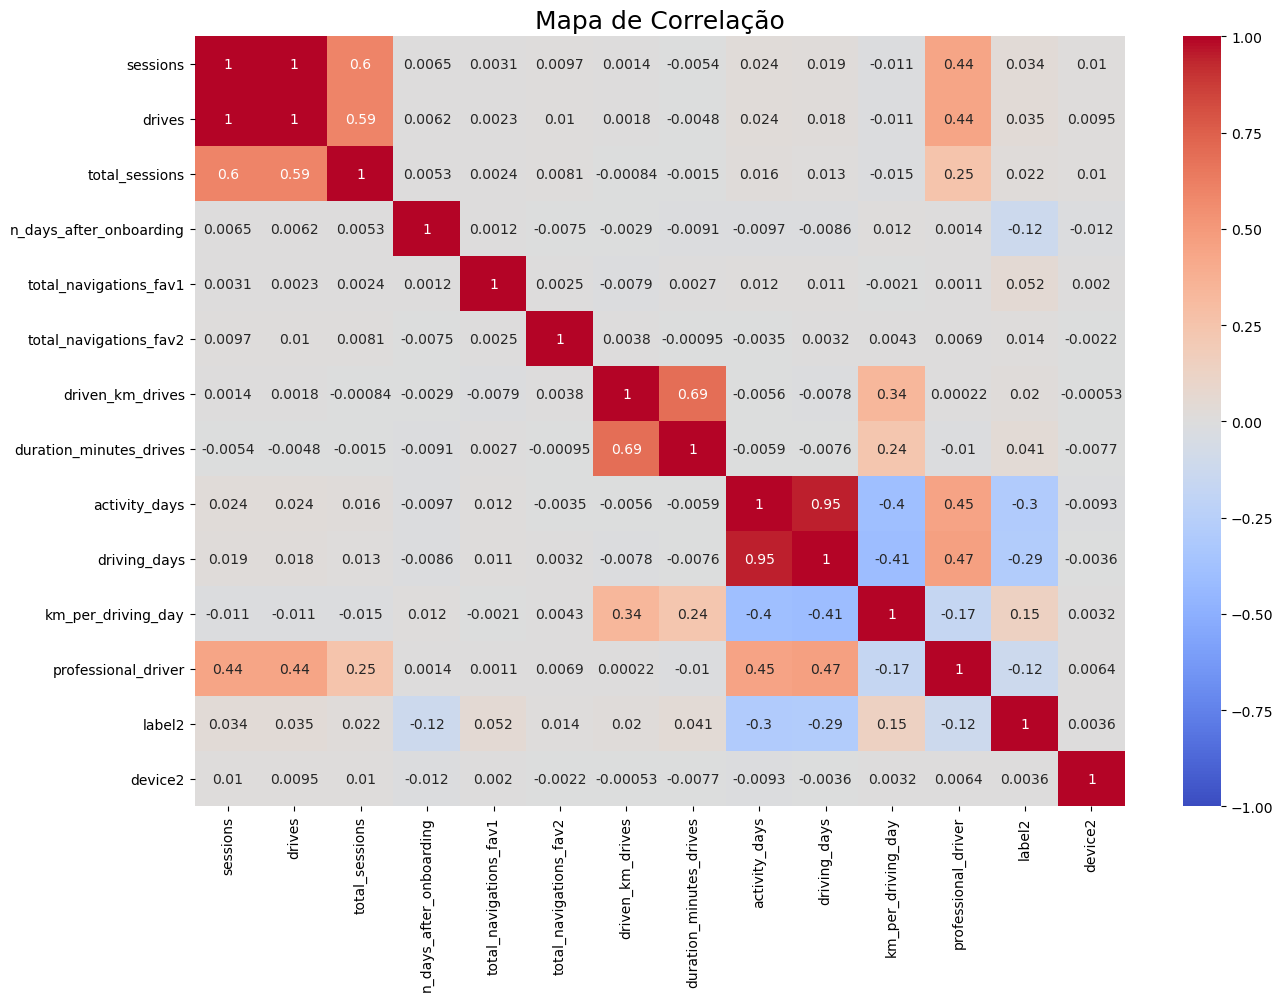

In [48]:
# Mapa de calor de correla√ß√£o

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Mapa de Correla√ß√£o', fontsize=18)
plt.show();

Observamos que as vari√°veis `sessions` e `drives` apresentam multicolinearidade, evidenciada pelo coeficiente de correla√ß√£o igual a $1.0$. Da mesma forma, as vari√°veis `driving_days` e `activity_days` tamb√©m exibem  multicolinearidade, com um coeficiente de correla√ß√£o de $0.95$. 

Estabelecemos um limite inferior para o coeficiente de correla√ß√£o em $0.7$.

## **Desenvolvimento do modelo**

Nessa se√ß√£o vamos definir a vari√°vel alvo, separar os dados para treinamento e teste, e fazer ajuste do modelo.

Para construir o modelo, √© necess√°rio decidir quais vari√°veis $X$ ser√£o inclu√≠das no modelo para prever a vari√°vel alvo `label2`. Eliminamos as seguintes vari√°veis e atribuimos os resultados a `X`:


* `label2` (alvo)
* `sessions` e `driving_days` (alta multicolinearidade)

Note que optamos por descartar as vari√°veis `sessions` e `driving_days` em vez de `drives` e `activity_days`. A justificativa para essa escolha reside no fato de que as vari√°veis mantidas para a modelagem apresentavam correla√ß√µes ligeiramente mais fortes com a vari√°vel alvo em compara√ß√£o com as vari√°veis que foram descartadas.

In [49]:
# Isolamos as vari√°veis preditoras

X = df.drop(columns = ['label2'])

In [50]:
# Definimos a vari√°vel alvo

y = df['label2']

Usamos a fun√ß√£o [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do scikit-learn para dividir os dados de treino/teste utilizando as vari√°veis $X$ e $y$ que foram atribu√≠das anteriormente. O objetivo √© ajustar o modelo utilizando o conjunto de treinamento e, posteriormente, avaliar o desempenho do modelo no conjunto de teste para evitar qualquer vazamento de dados.

Dado o desequil√≠brio na classe-alvo (82% "retained" contra 18% "churned"), √© crucial garantir que a divis√£o dos conjuntos de treinamento e teste n√£o enviesadamente represente demais ou sub-represente a frequ√™ncia da classe minorit√°ria. Para isso, definimos o par√¢metro `stratify` da fun√ß√£o como `y` para assegurar que a classe minorit√°ria esteja presente nos conjuntos de treinamento e teste na mesma propor√ß√£o que aparece no conjunto de dados geral.

In [51]:
# Dividimos os dados

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [52]:
# Verificamos

X_train.head()

sessions    drives  total_sessions  n_days_after_onboarding  \
3483   0.083445  0.083893        0.074222                 0.296053   
13354  0.075370  0.075503        0.200258                 0.422197   
6059   0.072678  0.080537        0.050407                 0.209668   
198    0.021534  0.021812        0.153593                 0.944508   
12381  0.002692  0.003356        0.102049                 0.228261   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
3483                 0.000000                0.036145          0.307633   
13354                0.000000                0.084337          0.264992   
6059                 0.292880                0.007229          0.119055   
198                  0.148867                0.077108          0.040015   
12381                0.000000                0.000000          0.130333   

       duration_minutes_drives  activity_days  driving_days  \
3483                  0.093688       0.064516      0.000000   
13354                 0.293191       0.419355      0.400000   
6059                  0.087750       0.516129      0.366667   
198                   0.017730       0.322581      0.333333   
12381                 0.126514       0.000000      0.000000   

       km_per_driving_day  professional_driver  device2  
3483             0.000000                  0.0      0.0  
13354            0.030576                  0.0      0.0  
6059             0.015182                  0.0      0.0  
198              0.005873                  0.0      0.0  
12381            0.000000                  0.0      1.0

Utilizamos o scikit-learn para instanciar e ajustar um modelo de regress√£o log√≠stica.

In [53]:
model = LogisticRegression(max_iter=400)

model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

Vamos ver os coeficientes que representam a mudan√ßa nas probabilidades logar√≠tmicas da vari√°vel alvo para cada aumento de uma unidade em X correspondente. Podemos acessar os coeficientes de cada vari√°vel chamando o atributo `.coef_` no modelo de regress√£o log√≠stica. Esses coeficientes est√£o na mesma ordem em que as vari√°veis s√£o listadas no conjunto de dados. 

In [54]:
pd.Series(model.coef_[0], index=X.columns)

sessions                   0.451851
drives                     0.806392
total_sessions             0.045961
n_days_after_onboarding   -1.304700
total_navigations_fav1     1.389242
total_navigations_fav2     0.471196
driven_km_drives          -0.339836
duration_minutes_drives    1.632780
activity_days             -2.325994
driving_days              -0.964188
km_per_driving_day         0.045645
professional_driver        0.086284
device2                   -0.028380
dtype: float64

Verificamos o atributo `intercept_` do modelo para obter a intercepta√ß√£o do modelo.

In [55]:
model.intercept_

array([-0.1062755])

#### **Verifica√ß√£o da √∫ltima hip√≥tese**

Para avaliar a rela√ß√£o linear entre as vari√°veis $X$ e $logit$ de $y$ √© necess√°rio construir um gr√°fico de regress√£o, conhecido como regplot.

Iniciamos utilizando o m√©todo `predict_proba()` para calcular a probabilidade de resposta para cada amostra nos dados de treinamento, passando os dados de treinamento como argumento para o m√©todo. Atribua o resultado a uma vari√°vel denominada `training_probabilities`. Isso gerar√° uma matriz 2-D na qual cada linha representa um usu√°rio em `X_train`. A primeira coluna corresponde √† probabilidade de o usu√°rio continuar a utilizar o aplicativo, enquanto a segunda coluna corresponde √† probabilidade de o usu√°rio abandonar o aplicativo.

In [56]:
# As probabilidades previstas dos dados de treinamento

training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.61499912, 0.38500088],
       [0.81521598, 0.18478402],
       [0.78917834, 0.21082166],
       ...,
       [0.84080193, 0.15919807],
       [0.95383413, 0.04616587],
       [0.86177272, 0.13822728]])

Para obter as probabilidades logar√≠tmicas $logit$ da vari√°vel dependente $y$ em rela√ß√£o a ùëã utilizamos a seguinte rela√ß√£o 

<br>
$$
logit(p) = ln(\frac{p}{1-p}),
$$
<br>

onde $p$ √© a probabilidade de resposta.

In [57]:
# Copiar o dataframe `X_train` e atribuir a `logit_data`
logit_data = X_train.copy()

# Criar uma nova coluna `logit` no df `logit_data`
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Constru√≠mos um gr√°fico de regress√£o (regplot) no qual o eixo $x$ representa uma vari√°vel independente (neste caso, utilizamos `activity_days`), enquanto o eixo $y$ representa as probabilidades logar√≠tmicas das previs√µes. Para uma an√°lise mais aprofundada, ser√° necess√°rio criar um gr√°fico de regress√£o para cada vari√°vel independente $X$.

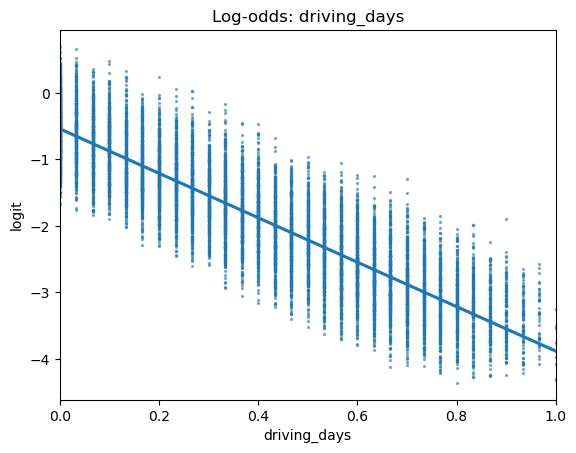

In [58]:
# Gr√°fico de regress√£o para log-odds

sns.regplot(x='driving_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: driving_days');

# **Interpreta√ß√£o dos resultados do modelo**

Se as hip√≥teses log√≠sticas forem satisfeitas, os resultados do modelo podem ser interpretados de maneira apropriada. Agora, avancemos para a realiza√ß√£o de previs√µes utilizando os dados de teste.

In [59]:
# Obtemos as previs√µes

y_preds = model.predict(X_test)

Calculamos a precis√£o do modelo usando o m√©todo `score()` com `X_test` e `y_test` como seus dois argumentos. O m√©todo `score()` automatiza a previs√£o de dados usando `X_test` e os compara com `Y_test` e, por padr√£o, usa a m√©trica `R-quadrado`. A melhor pontua√ß√£o poss√≠vel √© $1.0$.

In [60]:
model.score(X_test, y_test)

0.8312

Em seguida, calculamos a matriz de confus√£o com `y_test` e `y_preds` como seus argumentos.

In [61]:
cm = confusion_matrix(y_test, y_preds)

Para exibir a matriz de confus√£o utilizamos a fun√ß√£o `ConfusionMatrixDisplay()`.

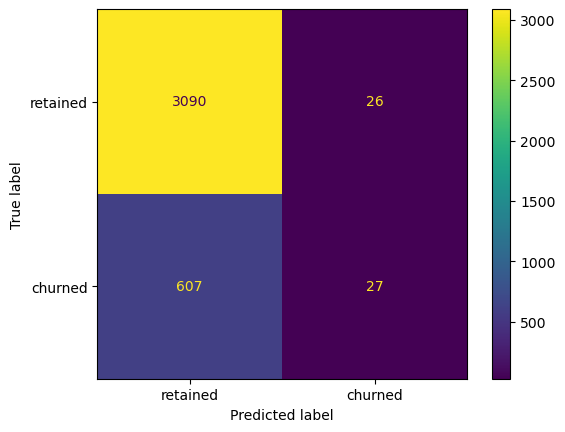

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

Podemos calcular as m√©tricas _precis√£o_ e _recall_ manualmente e comparar os resultados com os resultados da fun√ß√£o [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) do scikit-learn.

In [63]:
# Calcular precis√£o

precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.5094339622641509

In [64]:
# Calcular recall

recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.04258675078864353

In [65]:
# Criar classification report

target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.84      0.99      0.91      3116
     churned       0.51      0.04      0.08       634

    accuracy                           0.83      3750
   macro avg       0.67      0.52      0.49      3750
weighted avg       0.78      0.83      0.77      3750



Observamos que o modelo apresenta uma precis√£o mediana e um recall bastante baixo, indicando que ele tem a tend√™ncia de realizar muitas previs√µes falsas negativas e n√£o consegue identificar com acur√°cia os usu√°rios que est√£o propensos a abandonar o aplicativo.

Por fim, construimos um gr√°fico de barras dos coeficientes do modelo, proporcionando uma representa√ß√£o visual da import√¢ncia dos recursos no modelo.

In [66]:
# Criamos uma lista de tuplas (column_name, coeficiente)
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Ordenamos a lista por valor do coeficiente
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('duration_minutes_drives', 1.632779993840612),
 ('total_navigations_fav1', 1.3892422761956384),
 ('drives', 0.8063917878748634),
 ('total_navigations_fav2', 0.471195533538366),
 ('sessions', 0.4518506556986151),
 ('professional_driver', 0.08628439207413018),
 ('total_sessions', 0.04596079699036482),
 ('km_per_driving_day', 0.045645147277168466),
 ('device2', -0.028379500330567388),
 ('driven_km_drives', -0.33983623822625075),
 ('driving_days', -0.9641878629987725),
 ('n_days_after_onboarding', -1.3047004798447246),
 ('activity_days', -2.3259939455687126)]

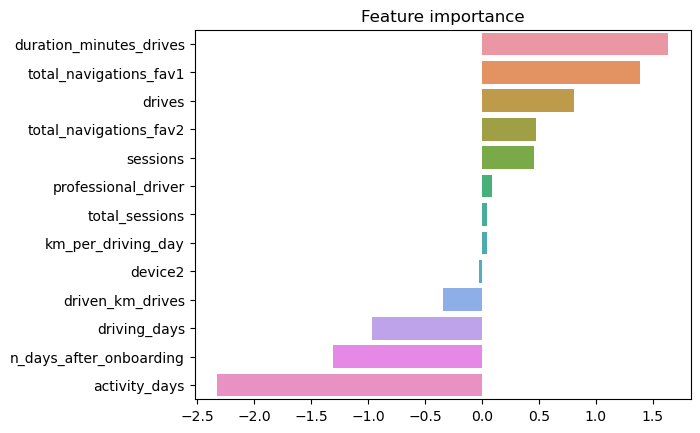

In [67]:
# Criamos o gr√°fico

sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

# **Conclus√µes Finais**

Neste projeto, desenvolvemos e avaliamos um modelo de regress√£o log√≠stica com o objetivo de antecipar a rotatividade de usu√°rios do aplicativo Waze. Utilizamos diversas vari√°veis como base para a previs√£o.

Inicialmente, realizamos uma an√°lise explorat√≥ria de dados, incluindo histogramas e gr√°ficos de dispers√£o, para extrair indicadores relevantes. A visualiza√ß√£o de dados confirmou a hip√≥tese de que, embora duas vari√°veis `driving_days` e `activity_days` estejam relacionadas, elas n√£o s√£o id√™nticas

Em seguida, conduzimos o pr√©-processamento de dados, um passo importante na constru√ß√£o de um modelo robusto. Solucionamos problemas relacionados √† presen√ßa de valores ausentes e outliers, uma vez que estes podem impactar significativamente o desempenho de um modelo de regress√£o log√≠stica. Lidamos com os outliers calculando o $95¬∫$ percentil de cada coluna e substituindo os valores que excediam esse limite. Al√©m disso, introduzimos novas vari√°veis, `km_per_driving_day` e `professional_driver`, para abordar especificamente os desafios do nosso projeto.

Para a sele√ß√£o de vari√°veis preditoras, utilizamos a matriz de correla√ß√£o de Pearson. Identificamos multicolinearidade entre as vari√°veis `sessions` e `drives` (coeficiente de correla√ß√£o igual a 1.0) e entre `driving_days` e `activity_days` (coeficiente de correla√ß√£o de 0.95). Optamos por descartar as vari√°veis `sessions` e `driving_days` na constru√ß√£o do modelo.

Ap√≥s a constru√ß√£o do modelo, avaliamos seu desempenho atrav√©s da pontua√ß√£o do modelo, m√©tricas de precis√£o e recall, e a matriz de confus√£o. Observamos que o modelo possui uma precis√£o mediana (53% de suas previs√µes positivas est√£o corretas) e um recall bastante baixo (apenas 9%), indicando uma tend√™ncia a realizar muitas previs√µes falsas negativas, n√£o identificando com acur√°cia os usu√°rios propensos a abandonar o aplicativo.

Finalmente, criamos um gr√°fico de barras dos coeficientes do modelo, oferecendo uma representa√ß√£o visual da import√¢ncia dos recursos. Diante disso, destacamos alguns pontos-chave:

*    A vari√°vel mais influente na previs√£o do modelo √© `activity_days`, representando o n√∫mero de dias em que o usu√°rio abre o aplicativo durante o m√™s, com uma correla√ß√£o negativa em rela√ß√£o √† rotatividade de usu√°rios.

*    Em modelos de regress√£o log√≠stica m√∫ltipla, as intera√ß√µes entre vari√°veis podem resultar em rela√ß√µes aparentemente contra-intuitivas, sendo tanto uma vantagem quanto uma limita√ß√£o na explicabilidade do modelo.

*    Apesar do modelo n√£o apresentar uma capacidade preditiva forte, sua utiliza√ß√£o pode orientar futuras investiga√ß√µes explorat√≥rias.

*    Sugere-se a implementa√ß√£o de novos recursos para aprimorar o valor preditivo. O recurso `professional_driver` se destacou como o terceiro preditor mais significativo. 

*    Informa√ß√µes adicionais sobre cada usu√°rio, como tempos de viagem e localiza√ß√µes geogr√°ficas, seriam ben√©ficas. Detalhes sobre a intera√ß√£o dos usu√°rios com o aplicativo, como a frequ√™ncia de comunica√ß√£o ou confirma√ß√£o de alertas de perigo na estrada, tamb√©m poderiam enriquecer o modelo.